Bài 1: Sử dụng Numpy xây dựng hàm Linear Regression

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#đọc file dữ liệu
df = pd.read_csv("forestfires.csv")
for col_name in df.columns:
    print("Total NaN: ", df[col_name].isna().sum())
    print("Total null: ", df[col_name].isnull().sum())
    print("Data type: ", df[col_name].dtype)
    print("+"*10)

Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total null:  0
Data type:  object
++++++++++
Total NaN:  0
Total null:  0
Data type:  object
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++


In [42]:
#chuyển đổi ký tự ngày và tháng thành dạng số
def convert_day(day):
    days = {
        "mon" : 2,
        "tue" : 3,
        "wed" : 4,
        "thu" : 5,
        "fri" : 6,
        "sat" : 7,
        "sun" : 8
    }
    return days.get(day.lower(), -1)

def convert_month(month):
    months = {
        "jan" : 1,
        "feb" : 2,
        "mar" : 3,
        "apr" : 4,
        "may" : 5,
        "jun" : 6,
        "jul" : 7,
        "aug" : 8,
        "sep" : 9,
        "oct" : 10,
        "nov" : 11,
        "dec" : 12
    }
    return months.get(month.lower(), -1)
df["day"] = df["day"].apply(convert_day)
df["month"] = df["month"].apply(convert_month)
print(df)

     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5      3    6  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4     10    3  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4     10    7  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6      3    6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6      3    8  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3      8    8  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4      8    8  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4      8    8  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4      8    7  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3     11    3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [ ]:
#chia tập dữ liệu thành test data và train data
import numpy as np
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_copy = X #back-up data sử dụng cho bài 3 

def split(X, y, train_size = 0.8):
    X = np.array(X)
    y = np.array(y)

    num_samples = X.shape[0]
    train_size = int(train_size * num_samples)

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split(X, y, train_size = 0.8)

In [44]:
#xây dựng hàm linear_regression
#công thức theta: theta = (X^T X)^(-1) X^T Y
class LinearRegression:
    def fit(self, X: np.ndarray, Y: np.ndarray) -> None:
        ones = np.ones((X.shape[0], 1))  # Thêm cột 1 để học bias
        X = np.hstack((ones, X))
        cov = np.matmul(X.T, X)  
        inv_cov = np.linalg.pinv(cov)  # pseudo-inverse để an toàn
        self.theta_ = inv_cov @ X.T @ Y
        
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return np.sqrt(np.mean((y - y_hat) ** 2))

    def predict(self, X: np.ndarray) -> np.ndarray:
        ones = np.ones((X.shape[0], 1))  # Thêm cột 1 để nhân bias
        X = np.hstack((ones, X))
        return X @ self.theta_

In [45]:
# Khởi tạo mô hình
model = LinearRegression()

# Huấn luyện mô hình với tập train
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Tính sai số RMSE
test_rmse = model.rmse(y_test, y_pred)
print("RMSE trên tập test: ", test_rmse)

RMSE trên tập test:  80.02441553026217


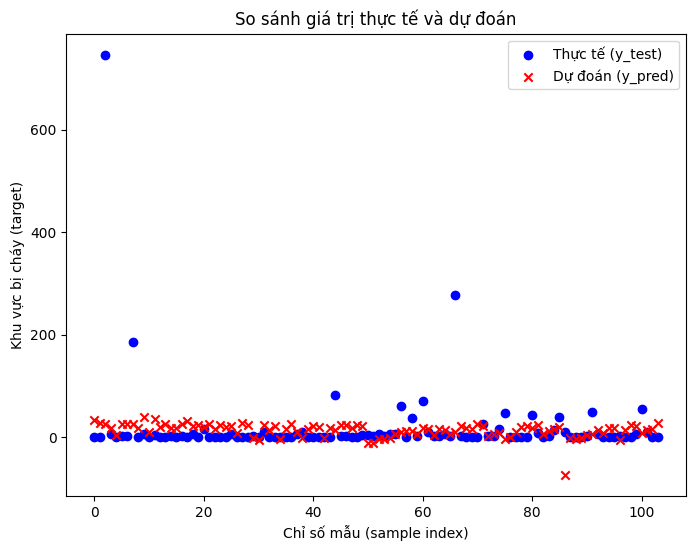

In [46]:
#trực quan hóa kết quả dự đoán vs. thực tế
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Thực tế (y_test)')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Dự đoán (y_pred)', marker='x')
plt.xlabel("Chỉ số mẫu (sample index)")
plt.ylabel("Khu vực bị cháy (target)")
plt.title("So sánh giá trị thực tế và dự đoán")
plt.legend()
plt.show()


Bài 2: Chuẩn hoá dữ liệu về phân phối có kỳ vọng là 0 và phương sai là 1.

In [54]:
#xây dựng hàm chuẩn hóa dữ liệu về mean = 0, std = 1
def standardize(X):
    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

#hàm chuẩn hóa dữ liệu tập train và test
def std_data(X_train, X_test):
    mean = X_train.mean(axis = 0)
    std = X_test.std(axis = 0)
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled, mean, std


#chuẩn hóa X
X_train_scaled, X_test_scaled, X_mean, X_std = std_data(X_train, X_test)
#chuẩn hóa Y
y_train_scaled, y_mean, y_std = standardize(y_train)
y_test_scaled = (y_test - y_mean) / y_std


In [55]:
# khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

#huấn luyện mô hình
model.fit(X_train_scaled, y_train_scaled)

# Dự đoán trên tập test
y_pred_scaled = model.predict(X_test_scaled)

#tính toán sai số RMSE (Root Mean Square Error)
rmse_scaled = np.sqrt(np.mean(((y_test_scaled - y_pred_scaled) ** 2)))
print("RMSE: ", rmse_scaled)

RMSE:  1.3630807143884611


Chỉ số RMSE sau chuẩn hóa X và y giảm đáng kế vì đã đưa toàn bộ dữ liệu về cùng thang đo, tránh bị ảnh hưởng bởi các giá trị lớn nhỏ khác nhau giữa các cột

Bài 3: Tiến hành kỹ thuật Feature Engineering, tìm ra các thuộc tính có tính
chất colinearity (linearly dependent). Huấn luyện lại phương pháp hồi quy tuyến tính
với bộ dữ liệu chỉ giữ lại các thuộc tính uncorrelated

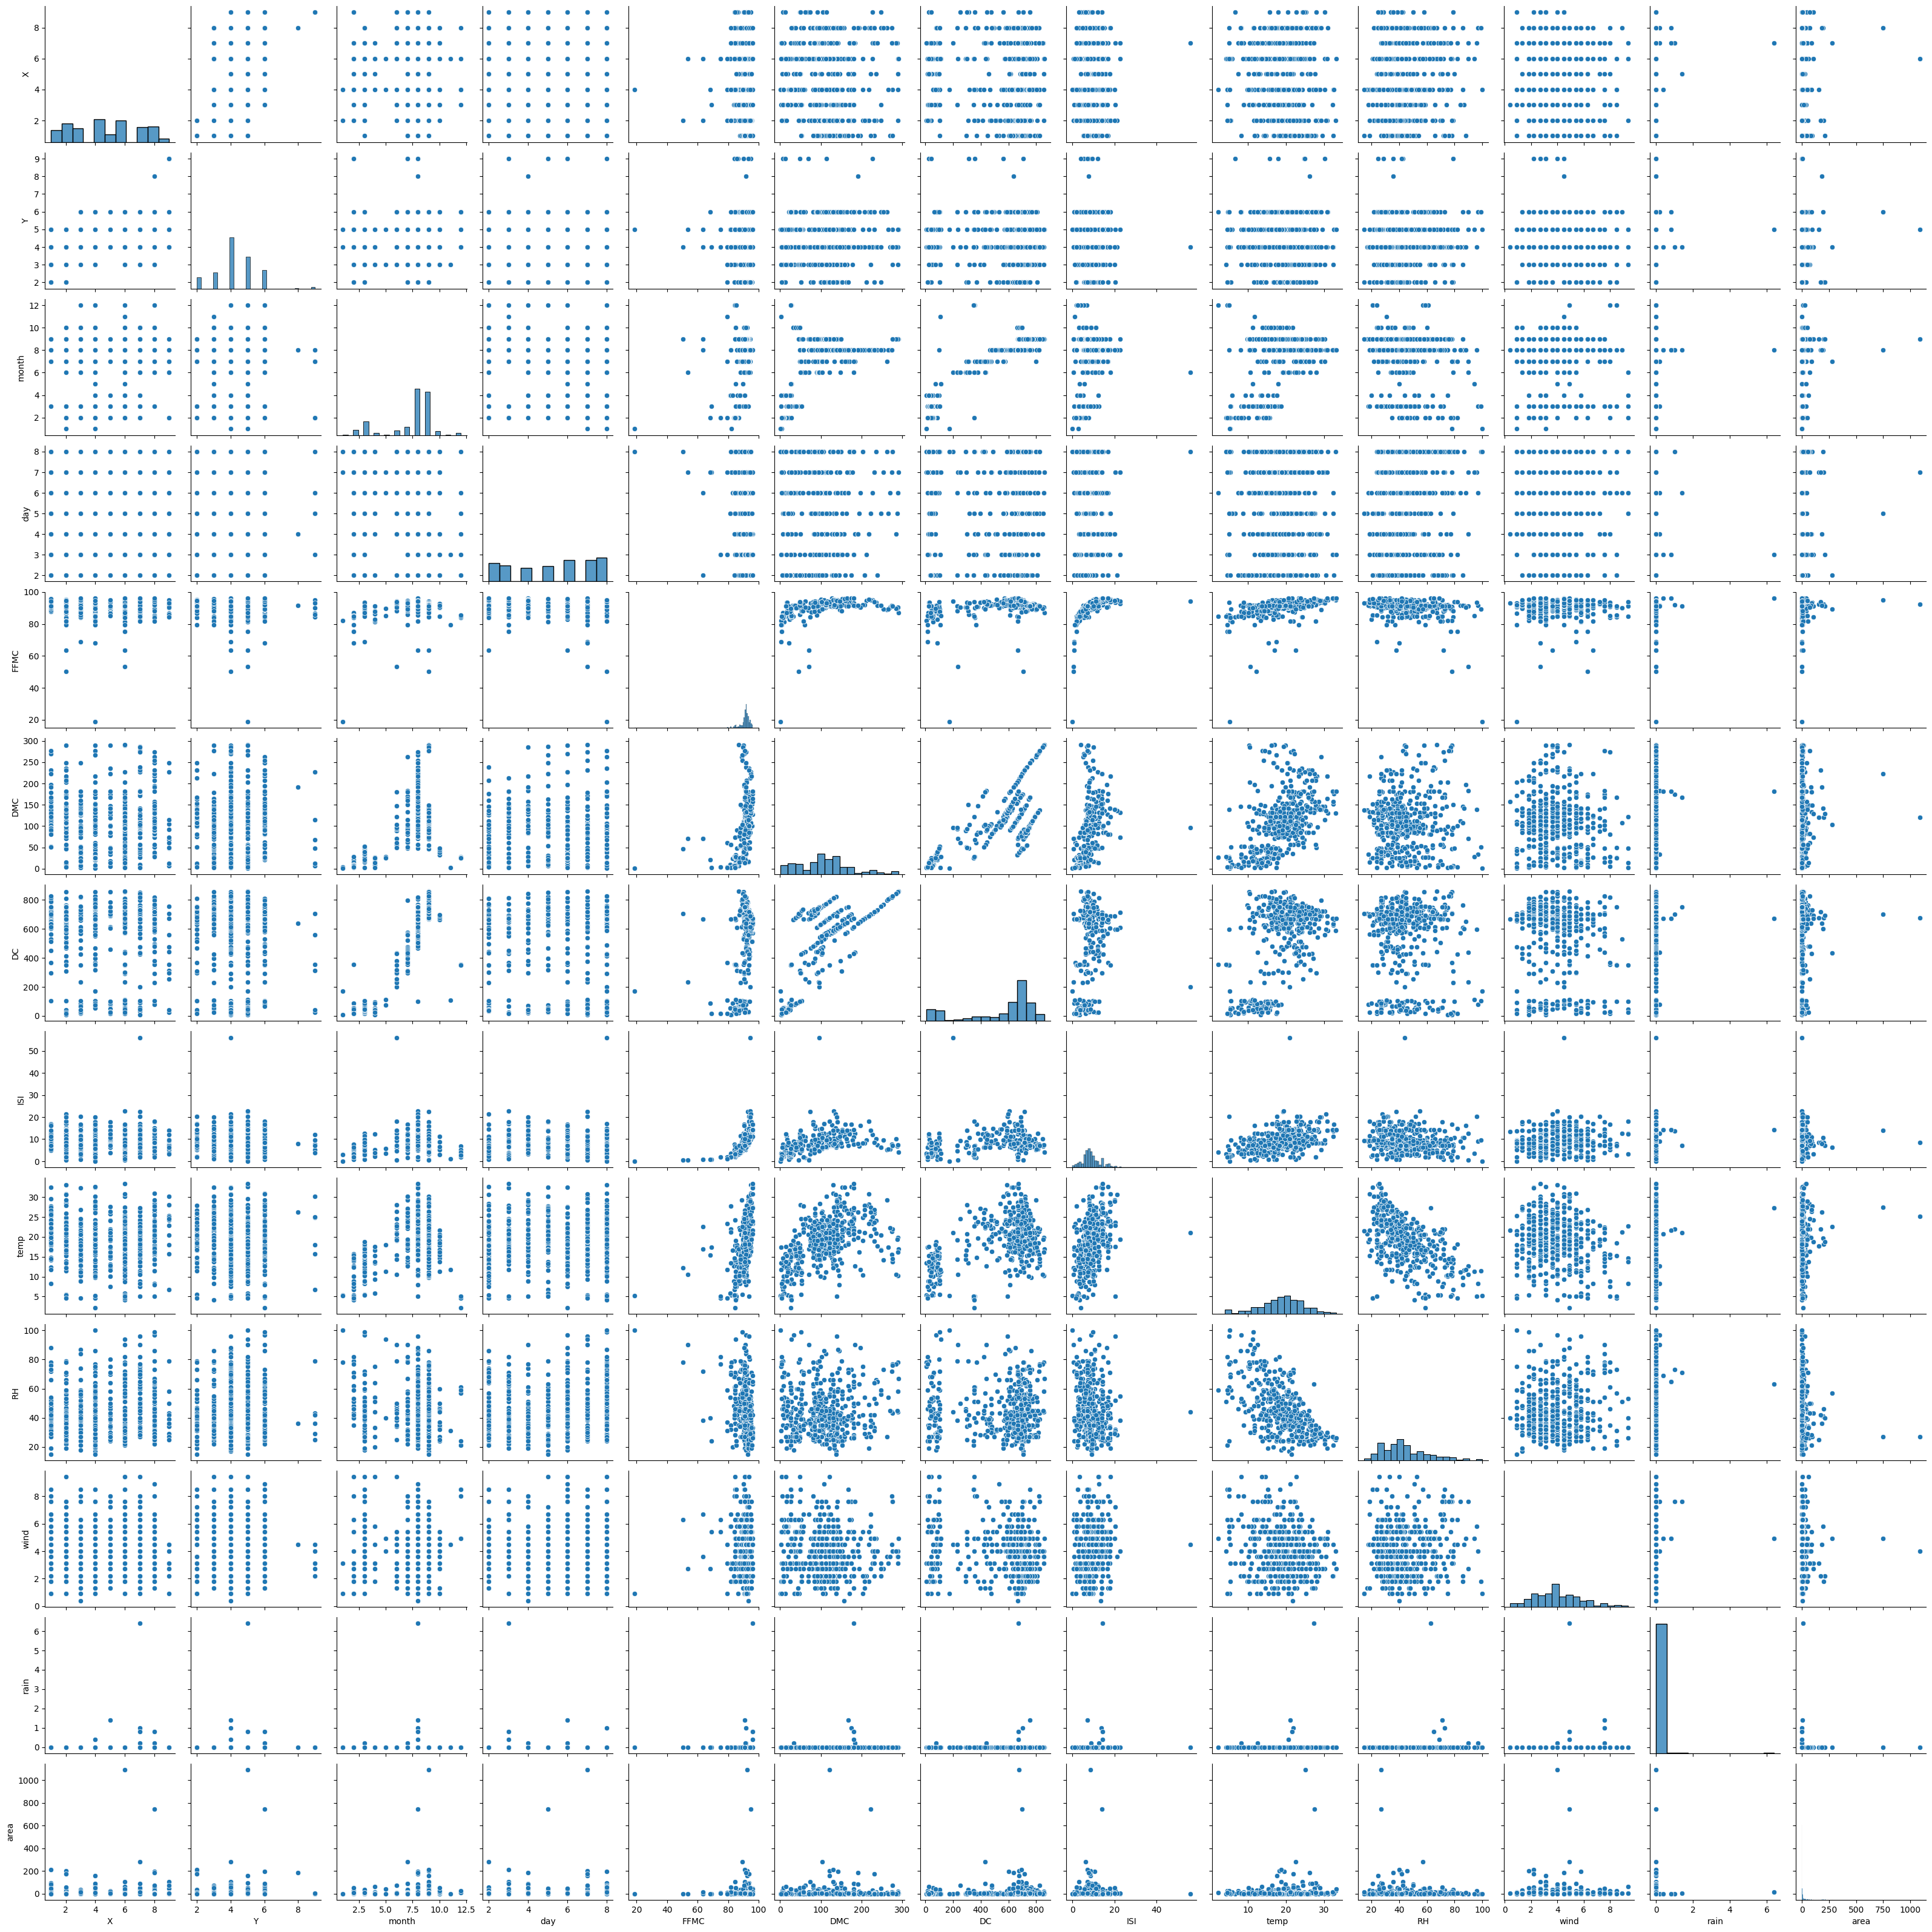

In [71]:
import seaborn as sns

sns.pairplot(df)
plt.show()

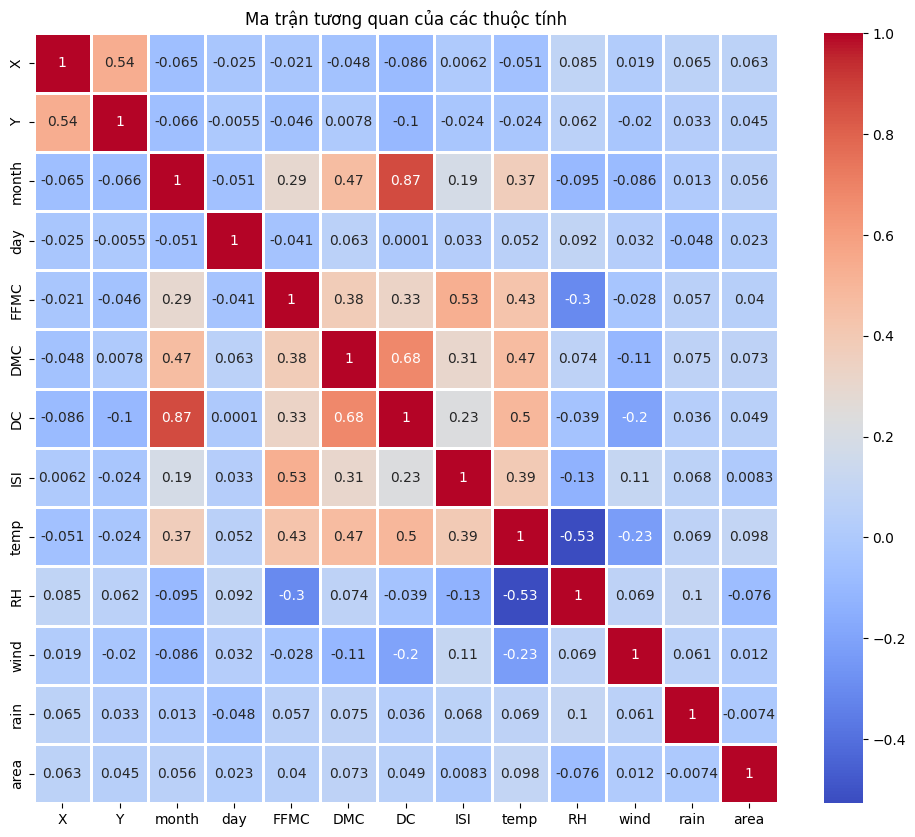

In [72]:
corr_matrix = df.corr()

plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 2.0)
plt.title('Ma trận tương quan của các thuộc tính')
plt.show()

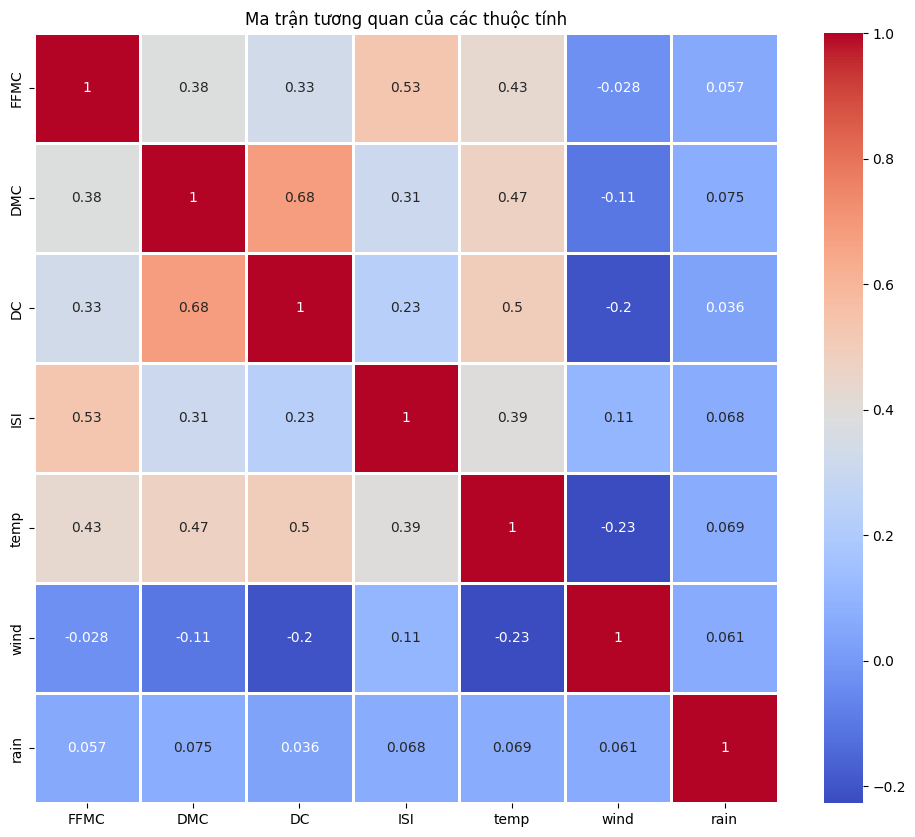

In [78]:
X_float = X_copy.drop(columns= X_copy.select_dtypes(include = ['int']).columns)
corr_matrix1 = X_float.corr()

plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix1, annot = True, cmap = 'coolwarm', linewidths = 2.0)
plt.title('Ma trận tương quan của các thuộc tính')
plt.show()

Vì không có dữ liệu nào trên ngưỡng 0.8 (theo yêu cầu giảng viên) nên sẽ loại bỏ top 3 dữ liệu cao nhất trong ma trận và huấn luyện lại mô hình

In [79]:
# Tính ma trận tương quan
corr_matrix = X_float.corr().abs()  # Lấy giá trị tuyệt đối để xét độ mạnh yếu

# Bỏ các giá trị trên đường chéo (1.0) để không xét chính nó
np.fill_diagonal(corr_matrix.values, 0)

# Lấy top 3 cặp thuộc tính tương quan cao nhất 
top_3_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(3)
print("Top 3 cặp thuộc tính tương quan cao nhất:\n", top_3_corr)

# Chọn ngẫu nhiên 1 cột loại bỏ
columns_to_drop = set()
for idx in top_3_corr.index:
    columns_to_drop.add(idx[1])  

print("Các cột sẽ bị loại bỏ do tính tương quan:", columns_to_drop)

# Loại bỏ các cột khỏi bộ dữ liệu
X_new = X_float.drop(columns=columns_to_drop)

# Huấn luyện lại mô hình trên dữ liệu mới
mean = X_new.mean(axis=0)
std = X_new.std(axis=0)
X_new_scaled = (X_new - mean) / std

mean_y = y_train.mean()
std_y = y_train.std()
y_train_scaled = (y_train - mean_y) / std_y
y_test_scaled = (y_test - mean_y) / std_y

X_train_new = X_new_scaled.iloc[:len(X_train), :]  
X_test_new = X_new_scaled.iloc[len(X_train):, :] 

model = LinearRegression()
model.fit(X_train_new, y_train_scaled)

y_pred_scaled = model.predict(X_test_new)

rmse_scaled = np.sqrt(np.mean((y_test_scaled - y_pred_scaled) ** 2))
print("RMSE trên dữ liệu chuẩn hóa sau khi loại bỏ collinearity: ", rmse_scaled)

Top 3 cặp thuộc tính tương quan cao nhất:
 DC    DMC     0.682192
FFMC  ISI     0.531805
DC    temp    0.496208
dtype: float64
Các cột sẽ bị loại bỏ do tính tương quan: {'DMC', 'ISI', 'temp'}
RMSE trên dữ liệu chuẩn hóa sau khi loại bỏ collinearity:  1.3740819482613593


Bài 4: Sử dụng thư viện Machine Learning (Sklearn hoặc Skorch) thực thi lại phương pháp Linear Regression

RMSE: 108.4323676115801


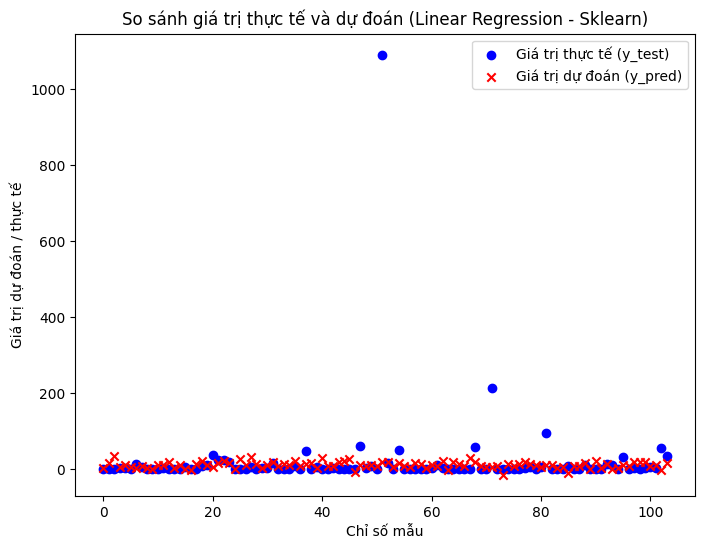

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('forestfires.csv')  

#chuyển đổi ký tự ngày và tháng thành dạng số
def convert_day(day):
    days = {
        "mon" : 2,
        "tue" : 3,
        "wed" : 4,
        "thu" : 5,
        "fri" : 6,
        "sat" : 7,
        "sun" : 8
    }
    return days.get(day.lower(), -1)

def convert_month(month):
    months = {
        "jan" : 1,
        "feb" : 2,
        "mar" : 3,
        "apr" : 4,
        "may" : 5,
        "jun" : 6,
        "jul" : 7,
        "aug" : 8,
        "sep" : 9,
        "oct" : 10,
        "nov" : 11,
        "dec" : 12
    }
    return months.get(month.lower(), -1)
df["day"] = df["day"].apply(convert_day)
df["month"] = df["month"].apply(convert_month)

# Chia dữ liệu thành features và target
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values  

# Chia dữ liệu thành training data và test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Tính RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Trực quan hóa kết quả
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Giá trị thực tế (y_test)')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Giá trị dự đoán (y_pred)', marker='x')
plt.xlabel("Chỉ số mẫu")
plt.ylabel("Giá trị dự đoán / thực tế")
plt.title("So sánh giá trị thực tế và dự đoán (Linear Regression - Sklearn)")
plt.legend()
plt.show()